# The Do-Operator and Bayesian Models


It is also a foundational idea in causal methods,
used to express, in precise mathematical language,
what counterfactual interventions would look like.
The do-operator from causal inference has a tight connection to probabilistic modelling.
But what exactly is that connection?

Having myself been previously confused about the link between graphical models,
causal structure, and more,
here's my current understanding of the connection.

## Causal models and Bayesian models, in brief

Let’s start first with a brief overview of the connection between 
causal models and Bayesian models. 
In doing my own study on causality, 
it soon became clear to me that causal models 
can be read off from mathematical equations quite easily. 
For a moment, let's assume we have the following set of equations 
that we presume to describe the data that we observe:



$$b = \delta d + \epsilon e + \sigma_b$$

and 

$$a = \beta b + \gamma c + \sigma_a$$



My convention here is that the English letters represent data, 
while the Greek letters represent parameters of the model.



To read off the causal model from this set of equations, 
everything on the right is causal for the stuff on the left.
By those equations, 
we state that the values of $a$ that we observe 
are caused by values of $b$ and $c$ and their Greek coefficients $\beta$ and $\gamma$
plus some noise $\sigma_a$,
while the values of $b$ that we observe 
are caused by the values of $d$ and $e$ and their Greek coefficients $\delta$ and $\epsilon$
plus some noise $\sigma_b$.


**With Bayesian inference on this model, 
our task here is to estimate the coefficients**, 
$\beta$, $\gamma$, $\delta$, and $\epsilon$. 
More precisely, we are interested in estimating their expected value and uncertainty. 

In order to express the model in such a way that reflects its probabilistic in nature, 
we need some syntax to express the idea that 
because $\delta$, $\epsilon$ and $\sigma_b$ are uncertain 
and are modelled by a probability distribution, 
therefore $b$ is uncertain and has a corresponding probability distribution too. 

At the same time, 
we need an analogous syntax to express that
because $\beta$, $\gamma$, and $\sigma_a$ are uncertain
and are modelled by a probability distribution,
therefore $a$ is also uncertain and has a corresponding probability distribution too. 



Moreover, if we assume that $c$, $d$, $e$ are stochastic 
because they are drawn from a distribution, 
then we have ~~a classic case where everything is unknown and we can’t do anything~~ 
an awesome modelling problem at hand! 🙂 
In any case, for the first equation, 
our expression for the distribution of $b$ 
conditioned on everything on the right would look something like:

$$P(b | \delta, \epsilon, \sigma_b, d, e)$$

And likewise, the distribution of $a$ conditioned on everything on the right would look something like this:

$$P(a | \beta, \gamma, \sigma_a, b, c)$$


Now, in Bayesian inference, 
we usually regard $(b, c, d, e)$ as being fixed (and hence sacred), 
because they are the *data that we have observed.* 
By convention, in many probabilistic modelling problems, 
we’re not really concerned about the data generating processes for $(b, c, d, e)$ 
because they aren’t usually the sample-invariant, 
intrinsic parameter of a system we’re interested in,
unlike the Greek-letter symbols which take on their values
independent of any given measured sample.

## Causal inference vs Bayesian inference, in brief

I’d now like to address “causal inference” vs. “bayesian inference”; I think the use of a contrast is going to be helpful here.

Bayesian inference asks the question, “given the observed data and a presumed model with parameters, what is the expectation and uncertainty in the parameters that could have generated the observed data?”

Causal inference asks the question, “given the observed data, what are plausible structures of the model that could have generated the observed data?”

## Structures, graphical and in equations

By structures, we’re really asking about the relationships between variables. 
Using the above example again, 
if $a$ is caused by $b$ and $c$, 
then in abstract, we'd write that $a = f(b, c)$. 
We would then draw the following diagram to express the relationship:


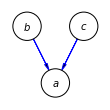

In [1]:
import daft

pgm = daft.PGM()
pgm.add_node("a", r"$a$", 1.5, 1)
pgm.add_node("b", r"$b$", 1, 2)
pgm.add_node("c", r"$c$", 2, 2)

a_color = {"ec": "blue"}

pgm.add_edge("b", "a", plot_params=a_color)
pgm.add_edge("c", "a", plot_params=a_color)
pgm.render();

Likewise, since we presume that $b$ is caused by $d$ and $e$, 
then the functional form of the causal relationship will be $b = g(d, e)$. 
We would then draw the following diagram to express the relationship:

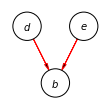

In [2]:
pgm = daft.PGM()
pgm.add_node("b", r"$b$", 1.5, 1)
pgm.add_node("d", r"$d$", 1, 2)
pgm.add_node("e", r"$e$", 2, 2)

b_color = {"ec": "red"}


pgm.add_edge("d", "b", plot_params=b_color)
pgm.add_edge("e", "b", plot_params=b_color)
pgm.render();

And taken together, the full model would look like:

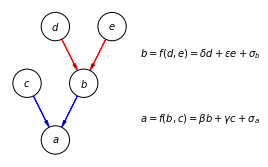

In [3]:
pgm = daft.PGM()
pgm.add_node("a", r"$a$", 1.5, 1)
pgm.add_node("b", r"$b$", 2, 2)
pgm.add_node("c", r"$c$", 1, 2)
pgm.add_node("d", r"$d$", 1.5, 3)
pgm.add_node("e", r"$e$", 2.5, 3)

pgm.add_edge("c", "a", plot_params=a_color)
pgm.add_edge("b", "a", plot_params=a_color)
pgm.add_edge("d", "b", plot_params=b_color)
pgm.add_edge("e", "b", plot_params=b_color)

pgm.add_text(3, 1.25, r"$a = f(b, c) = \beta b + \gamma c + \sigma_a$")
pgm.add_text(3, 2.4, r"$b = f(d, e) = \delta d + \epsilon e + \sigma_b$")

pgm.render();

In economics, the term “structural equation models” 
refers to the system of equations 
that form the econometric model that economists build. 
Usually, those models are linear in nature. 
On occasion, though, additional functional forms might be used 
(sigmoidal, piecewise linear, neural network, etc.), 
if they help model the phenomena at hand. 
Whatever the form of the equation gets encapsulated into $f(v_1, v_2, ..., v_n)$,
where $v_1... v_n$ refer to the variables like $b$ and $c$ above.

Structure, then, can refer to both the graphical structure of the model 
and the particular form of equations. 
As far as I have seen, 
most causal models assume some kind of linear equation between variables, 
though there are exceptions; 
in addition, causal inference, as taught, 
is usually concerned with inferring the *graphical* relationship between variables, 
presuming some linear form underneath. 
Inferring the model structure is what we call "model inference".

*A note for deep learners: this is what model inference actually is: 
inferring the structure of a model. 
More generally, if you think about linguistic convention, 
“X inference” usually refers to the tools and processes used in inferring X. 
Calling model inference the forward pass through the model breaks linguistic convention, 
and hence introduces viscosity in communication with others 
who adopt said linguistic convention!*

## Restating the distinction

At this point, I think it's an appropriate moment to try to re-state clearly
what the relationship between a "causal inference" and a "Bayesian inference" is.
They are **both** concerned with the system of equations that make up our model.
However, in causal inference, 
we are primarily concerned with the relationship between observed variables, 
expressed as math equations.
In Bayesian inference, we are primarily concerned with the parameters of those equations
and their uncertainty.

## The do-operator

Finally, we reach the point where we can touch the do-operator!
This is such a key and crucial idea to causal methods,
as it allows us to do **counterfactual** arguments conditioned on a presumed model.
To illustrate what we mean by the do-operator,
I'm going to rely on code, prose, and equations together.
To start, let's implement the full probabilistic model above in Python code.



In [4]:
import numpy as np 
from scipy.stats import norm
import pandas as pd 


In [5]:
# Equations
beta_dist = norm(-3, 0.2)
gamma_dist = norm(10, 0.1)
delta_dist = norm(10, 0.1)
epsilon_dist = norm(5, 0.2)
sigma_a_dist = norm(0, 0.3)
sigma_b_dist = norm(0, 0.2)


def a_equation(b, c):
    return beta_dist.rvs() * b + gamma_dist.rvs() * c + sigma_a_dist.rvs()

def b_equation(d, e):
    return delta_dist.rvs() * d + epsilon_dist.rvs() * e + sigma_b_dist.rvs()

The observed data that we would end up collecting 
for this system looks like the following:

In [6]:
cc = norm().rvs(1000)
dd = norm(-10, 1).rvs(1000)
ee = norm(10, 1).rvs(1000)

bb = b_equation(dd, ee)
aa = a_equation(bb, cc)


data = pd.DataFrame({"a": aa, "b": bb, "c": cc, "d": dd, "e": ee})
data

,a,b,c,d,e
0,177.990164,-51.789785,0.321286,-10.154643,9.303365
1,106.478753,-32.184789,-0.195249,-9.116371,11.142004
2,170.345215,-49.586181,0.301682,-10.587794,10.566361
3,212.756347,-62.844320,0.068756,-11.876259,10.449344
4,109.118252,-32.859087,-0.159875,-8.882795,10.561435
...,...,...,...,...,...
995,90.503097,-29.174091,-0.763291,-9.508598,12.484189
996,106.849944,-31.386702,0.104947,-8.716093,10.529070
997,182.907374,-52.761586,0.481205,-10.938268,10.618788
998,172.747260,-47.931252,1.083923,-10.259728,10.259689


And if we were to visualize the marginal distribution of each of the variables:

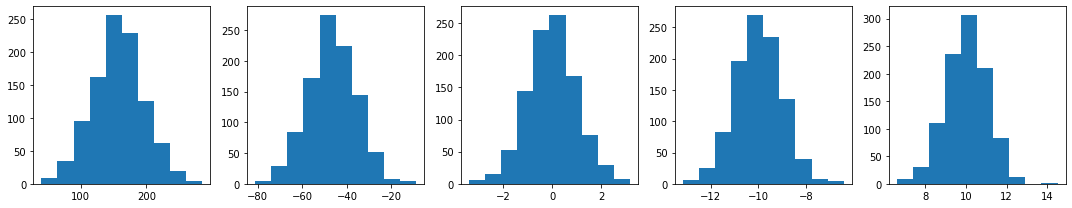

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(15, 3), ncols=5)

for var, ax in zip([aa, bb, cc, dd, ee], axes.flatten()):
    ax.hist(var)

plt.tight_layout()

Finally, plotting the joint distributions, we get:

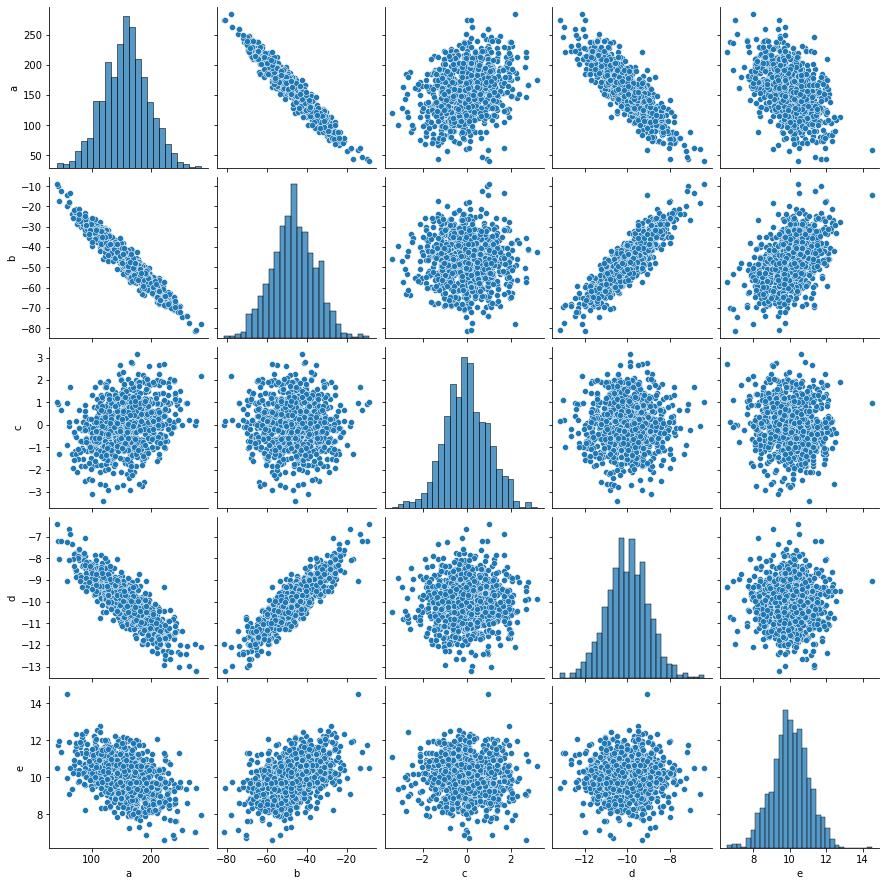

In [8]:
import seaborn as sns 

sns.pairplot(data)

Now that we have a feel for what kind of data we'll collect,
let's explore the three ways that the do-operator can be used.

### The do-operator: personalized counterfactuals

At an elementary level, the do-operator expresses mathematically the following quesiton,
“For a given sample, what if one of its variables took on a different value?” 
You can think of this as a "personalized" counterfactual for a given sample,
whether that sample is a patient, student, employee, citizen, or some other thing.

Some concrete examples of this in action are:

1. “For this given patient, what if the treatment given was the alternative treatment?”
2. “For this given student, what if the hours of instruction were increased?”
3. “For this given tennis player, what if the court they played on were grass instead of clay?”



As you can see, one of the questions we’re asking when asking counterfactuals 
are in fact *personalized* for a given sample.

If we go back to the structural equations above, 
we could isolate a given observational data point $(a, b, c)$ and then ask the question, 
“What if the variable $b$ took on a certain value $B$?” 
This question, when asked, results in our probabilistic structure changing a bit:

1. We are now asking for $P(a_i | do(b_i=B), \beta, \gamma, c_i)$, where $i$ refers to the particular sample index.
2. Our counterfactual question presumes a known value of $b$, and hence no longer requires us to generate it from $(d, e)$. We can effectively cut $(d, e)$ out of the picture.

As long as we preserve uncertainty in the parameter values, 
we can obtain counterfactual uncertainty as well.
To illustrate how we do personalized counterfactuals in a Bayesian setting,
let's see how to do it with PyMC.

### Implementation with PyMC

In [9]:
import pymc as pm

We first implement the set of equations.

In [10]:

with pm.Model() as model_a:
    a = pm.Data("a", data["a"])
    b = pm.Data("b", data["b"])
    c = pm.Data("c", data["c"])
    # Priors for model parameters
    beta = pm.Normal("beta", mu=0, sigma=3)
    gamma = pm.Normal("gamma", mu=0, sigma=3)
    sigma_a = pm.HalfCauchy("sigma_a", beta=1)
    pm.Normal("like", mu=beta * b + gamma * c, sigma=sigma_a, observed=a)


with pm.Model() as model_b:
    b = pm.Data("b", data["b"])
    d = pm.Data("d", data["d"])
    e = pm.Data("e", data["e"])
    delta = pm.Normal("delta", mu=0, sigma=3)
    epsilon = pm.Normal("epsilon", mu=0, sigma=3)
    sigma_b = pm.HalfCauchy("sigma_b", beta=1)
    pm.Normal("like", mu=delta * d + epsilon * e, sigma=sigma_b, observed=b)


Let's now plot the graphical model provided by PyMC.

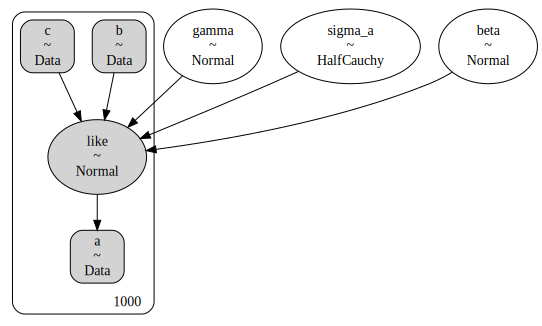

In [11]:
pm.model_to_graphviz(model_a)

In this model, we see that $a$, $b$, and $c$ are all observed data,
nested within the plate representing 1,000 data points.
$\beta$, $\gamma$, and $\sigma_a$ are the parameters of the model
that are invariant to any particular data point
and hence are located outside of the plate.
An analogous diagram exists for $b$'s model as well:

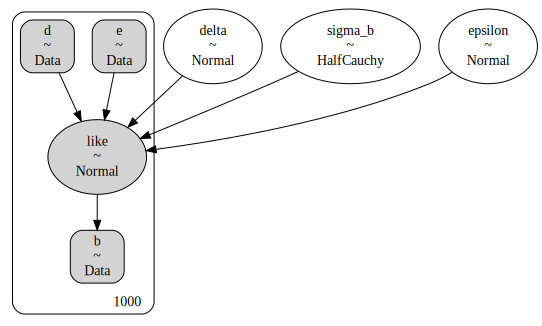

In [12]:
pm.model_to_graphviz(model_b)

### Parameter inference

We can now use PyMC's inference machinery, the Inference Buttom (tm),
to infer the values of the parameters above.

In [13]:
with model_a:
    idata_a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, gamma, sigma_a]
/opt/conda/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.9232, but should be close to 0.8. Try to increase the number of tuning steps.


In [14]:
with model_b:
    idata_b = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [delta, epsilon, sigma_b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.907, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9537, but should be close to 0.8. Try to increase the number of tuning steps.


I will be skipping over a rigorous Bayesian workflow here
because it is not the point of the notebook.
Nonetheless, here is a set of plots for our posteriors;
you can check-them against the original Gaussian distributions above.

array([<AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'gamma'}>,
       <AxesSubplot:title={'center':'sigma_a'}>], dtype=object)

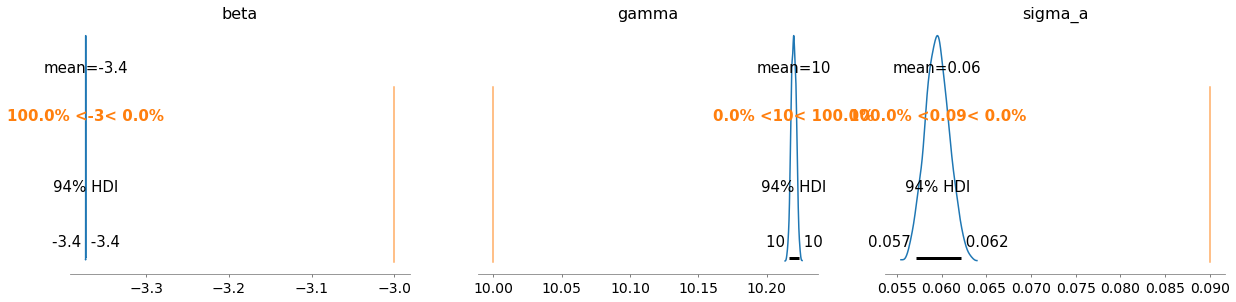

In [15]:
import arviz as az

az.plot_posterior(idata_a, ref_val=[-3, 10, 0.3**2])

array([<AxesSubplot:title={'center':'delta'}>,
       <AxesSubplot:title={'center':'epsilon'}>,
       <AxesSubplot:title={'center':'sigma_b'}>], dtype=object)

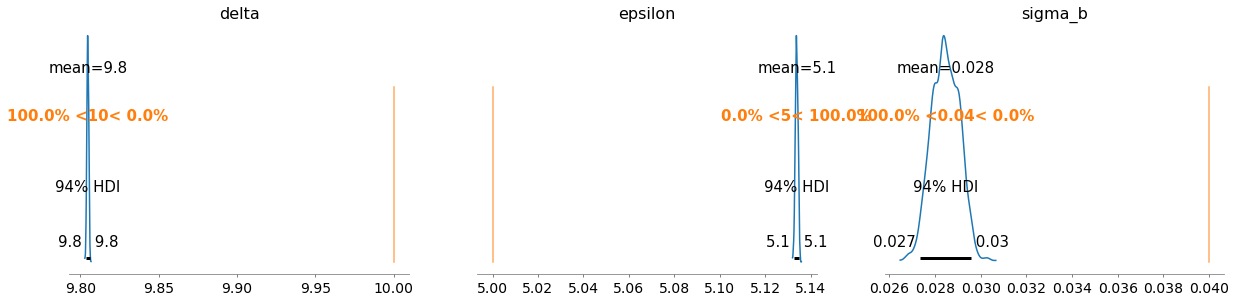

In [16]:
az.plot_posterior(idata_b, ref_val=[10, 5, 0.2**2])

In all of the cases, we're pretty close, though a bit off. 
As the goal here is to show a personalized counterfactual,
we're not going to worry too much about the parameter recovery accuracy.

### Personalized counterfactuals in PyMC

Personalized counterfactuals ask the question, 
"What would have happened for a particular sample
had one of its observed variables been a different value?"
In this case, we're going to take one of the observations 
and ask what would happen if we counterfactually set $b$ to a different value.

We'll start by isolating a sample of interest:

In [17]:
sample = data.sample(random_state=491)  # random state for reproducibility
sample["a"]

245    229.244749
Name: a, dtype: float64

We then simulate what the posterior for that sample would look like
under the original case vs. the counterfactual case:

In [18]:
import numpy as np 

with model_a:
    pm.set_data({"a": sample["a"], "b": sample["b"], "c": sample["c"]})
    ppc_or = pm.sample_posterior_predictive(idata_a)

    # cf = "counterfactual"
    pm.set_data({"a": sample["a"], "b": np.array([-20]), "c": sample["c"]})
    ppc_cf = pm.sample_posterior_predictive(idata_a)


Text(0.5, 1.0, 'Counterfactual')

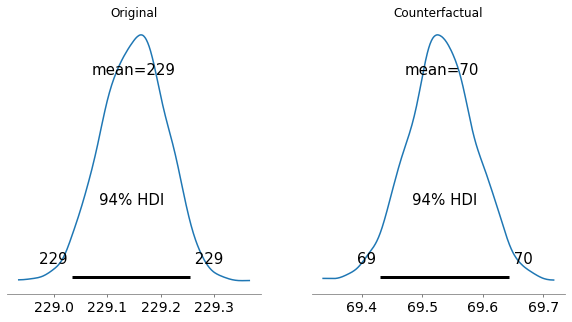

In [19]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
az.plot_posterior(ppc_or.posterior_predictive["like"], ax=axes[0])
axes[0].set_title("Original")

az.plot_posterior(ppc_cf.posterior_predictive["like"], ax=axes[1])
axes[1].set_title("Counterfactual")

What's really cool here is that we've done a personalized counterfactual
for that particular sample.

The key trick to enabling this
was using `pm.Data()` containers for our data,
thus registering them with PyMC (and Aesara underneath)
as being hot-swappable entities with `pm.set_data()`.

Finally, because our _posterior_ distributions 
contain our probabilistic beliefs having seen the data,
or more colloquially, "fits of our parameters",
we sample from the _posterior predictive_ distribution
to identify what we would have gotten in a counterfactual situation.

## The do-operator: global counterfactuals

Let’s also think about another possible counterfactual question: 
What if the system parameters were different?

Recall here that “system parameters” refer to the linear coefficients. 
They aren’t properties of any sample, 
but are properties of the entire system as a whole, 
hence the moniker “global” counterfactuals.

To do global counterfactuals, 
we actually need to condition the coefficients’ values on a particular value, 
just like we did for data on the personalized counterfactual. 
For example, if we conditioned $\beta$  to be equal to 3.14, then:

1. We are now asking for $P(a|do(\beta=3.14), \gamma, b, c)$. (Notice the omission of subscript $i$, it’s intentional!)
2. Our counterfactual question presumes a known value of $\beta$, but not a presumed known value of any of $(b, c)$. (We aren't asking about any particular sample, after all!)

One way we can do this is to reconstruct the model from our posteriors
while hard-coding the value of $\beta$ to 3.14.

Let's see how to make this happen.

Firstly, in order to take advantage of our fitted posteriors,
we will use a `from_posterior` function written implemented in the PyMC how-to guides.

In [20]:
from scipy import stats 

# Credit: https://docs.pymc.io/projects/examples/en/latest/pymc3_howto/updating_priors.html
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return pm.Interpolated(param, x, y)

Then, we'll need to rewrite the model a little bit,
this time hard-coding one of the variables to a particular value.

In [21]:
with pm.Model() as model_a_modified:
    a = pm.Data("a", data["a"])
    b = pm.Data("b", data["b"])
    c = pm.Data("c", data["c"])
    # Model parameters
    beta = -2
    gamma = from_posterior("gamma", idata_a.posterior["gamma"].values.flatten())
    sigma_a = from_posterior("sigma_a", idata_a.posterior["sigma_a"].values.flatten())
    pm.Normal("like", mu=beta * b + gamma * c, sigma=sigma_a, observed=a)

Finally, since our posteriors have become priors in this new model,
we sample from the prior predictive distribution:

In [22]:
with model_a_modified:
    trace = pm.sample_prior_predictive()

/opt/conda/lib/python3.9/site-packages/pymc/distributions/continuous.py:3674: RuntimeWarning: divide by zero encountered in double_scalars
  np.where(np.abs(pdf[index]) <= 1e-8, np.zeros(index.shape), (p - cdf[index]) / pdf[index]),


Now, we're able to examine how 

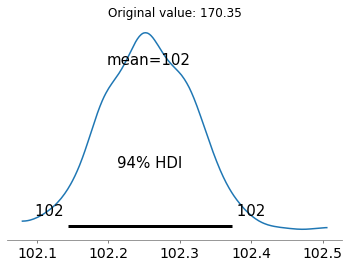

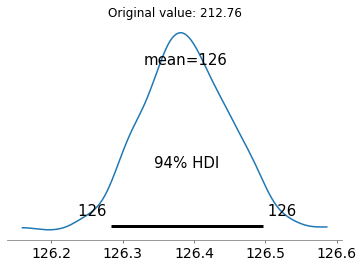

In [23]:
def plot_global_counterfactual(idx: int):
    az.plot_posterior(trace.prior_predictive["like"][0, :, idx])
    plt.gca().set_title(f"Original value: {data.loc[idx, 'a']:.2f}")


plot_global_counterfactual(2)
plot_global_counterfactual(3)

## The do-operator: combined global and personalized counterfactuals

If we’re thinking logically here, we’ll soon realize that it’s also possible to combine the two aforementioned counterfactuals together. We can ask the question, what is $P(a_i | do(\beta=3.14, b=B), \gamma, c_i)$? (Note again the presence of the index $i$!)

Algorithmically, this question essentially translates to:

1. picking out sample $i$, 
2. setting $b=B$, 
3. setting $beta=3.14$,
4. and evaluating what $a_i$ would look like under those two conditions.

For the sake of illustration, here it is in PyMC code:

In [24]:
with model_a_modified:
    pm.set_data({"a": sample["a"], "b": sample["b"], "c": sample["c"]})
    ppc_or = pm.sample_prior_predictive()

    # cf = "counterfactual"
    pm.set_data({"a": sample["a"], "b": np.array([-20]), "c": sample["c"]})
    ppc_cf = pm.sample_prior_predictive()

/opt/conda/lib/python3.9/site-packages/pymc/distributions/continuous.py:3674: RuntimeWarning: divide by zero encountered in double_scalars
  np.where(np.abs(pdf[index]) <= 1e-8, np.zeros(index.shape), (p - cdf[index]) / pdf[index]),


Text(0.5, 1.0, "Distribution of 'a' with $\\beta=3.14$ and $b=-20$")

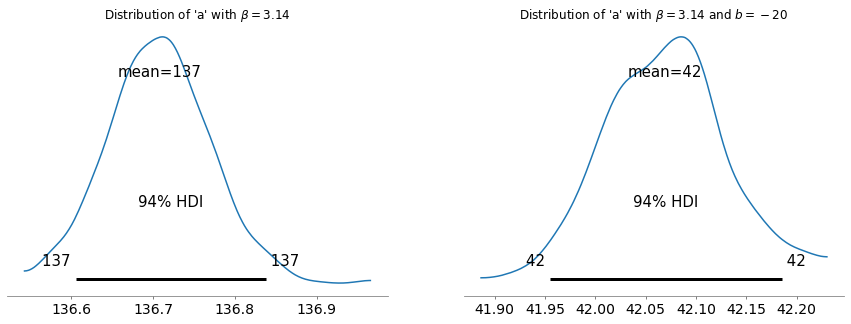

In [25]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
az.plot_posterior(ppc_or.prior_predictive["like"], ax=axes[0])
axes[0].set_title(r"Distribution of 'a' with $\beta=3.14$")

az.plot_posterior(ppc_cf.prior_predictive["like"], ax=axes[1])
axes[1].set_title(r"Distribution of 'a' with $\beta=3.14$ and $b=-20$")

## Framework

Having worked through this example, I’ve finally arrived at a framework for thinking through the connection between Bayesian models and causal models. 

To know which kind of counterfactual we need to employ, we have to be extremely clear on the exact question we’re trying to ask. Are we trying to ask:

- A systems-level question? (”What would happen to all of our observations if a system parameter was set to a particular value?”)
- A personalized question? (”What would have happened to this particular sample had its dependent variable been set to a particular value?”)
- A hybrid question? (”What would have happened to this particular sample had its dependent variable been set to a particular value *and* the system parameter set to a particular value?”)

If we have our variables’ dependencies clearly and explicitly stated, then it becomes easy to ask the do-operator family of questions, which basically are asking, “What happens if we set something in the model to a particular value?”